In [16]:
import datajoint as dj
from faker import Faker
fake = Faker()
schema = dj.Schema('Hiring')

In [17]:
@schema
class Manager(dj.Manual):
    definition="""
    manager_id : bigint unsigned  
    ---
    first_name : varchar(30) 
    last_name : varchar(30) 
    phone : bigint 
    email : varchar(30) 
    """

In [20]:
@schema
class Job(dj.Manual):
    definition = """
    job_id : varchar(12)   
    ---
    job_title : varchar(30) 
    open_date : date 
    end_date : date 
    description : varchar(200) 
    minimum_annual_salary : bigint unsigned  
    maximum_annual_salary : bigint unsigned  
    -> Manager
    """
    class Skill(dj.Part):
        definition = """
        -> master
        -> Skill
        """

In [19]:
@schema
class Skill(dj.Lookup):
    definition = """
    skill : varchar(24)
    """
    contents = zip(
        ("SQL", 
         "Java", 
         "Python", 
         "C++", 
         "JavaScript", 
         "R", 
         "Rust"))

In [21]:
@schema
class Applicant(dj.Manual):
    definition = """
    applicant_id : varchar(15) 
    ---
    first_name : varchar(30) 
    last_name : varchar(30) 
    phone : bigint unsigned  
    email : varchar(30)
    """
    class Skill(dj.Part):
        definition = """
        -> master
        -> Skill
        """

In [22]:
@schema
class Application(dj.Manual):
    definition = """
    -> Applicant
    --- 
    current_position : varchar(30) 
    -> Job
    """

In [23]:
@schema
class Interview(dj.Manual):
    definition = """
    -> Application
    ---
    interview_date : date 
    """

In [24]:
@schema
class Offer(dj.Manual):
    definition = """
    -> Interview
    ---
    start_date : date
    salary : bigint unsigned  
    """

In [25]:
@schema
class Acceptance(dj.Manual):
    definition = """
    -> Offer
    --- 
    """

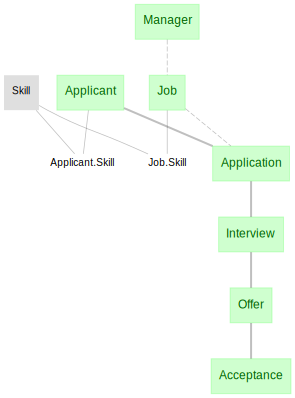

In [26]:
dj.Diagram(schema)

In [15]:
schema.drop()